In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataframe =  pd.read_csv("Rent.csv")
dataframe.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


Отсортируем данные для корректного отображения графика

In [4]:
sortedDataFrame = dataframe.sort_values(by=["area", "rent"])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(sortedDataFrame['area'], sortedDataFrame['rent'], test_size=0.2,
                                                    random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

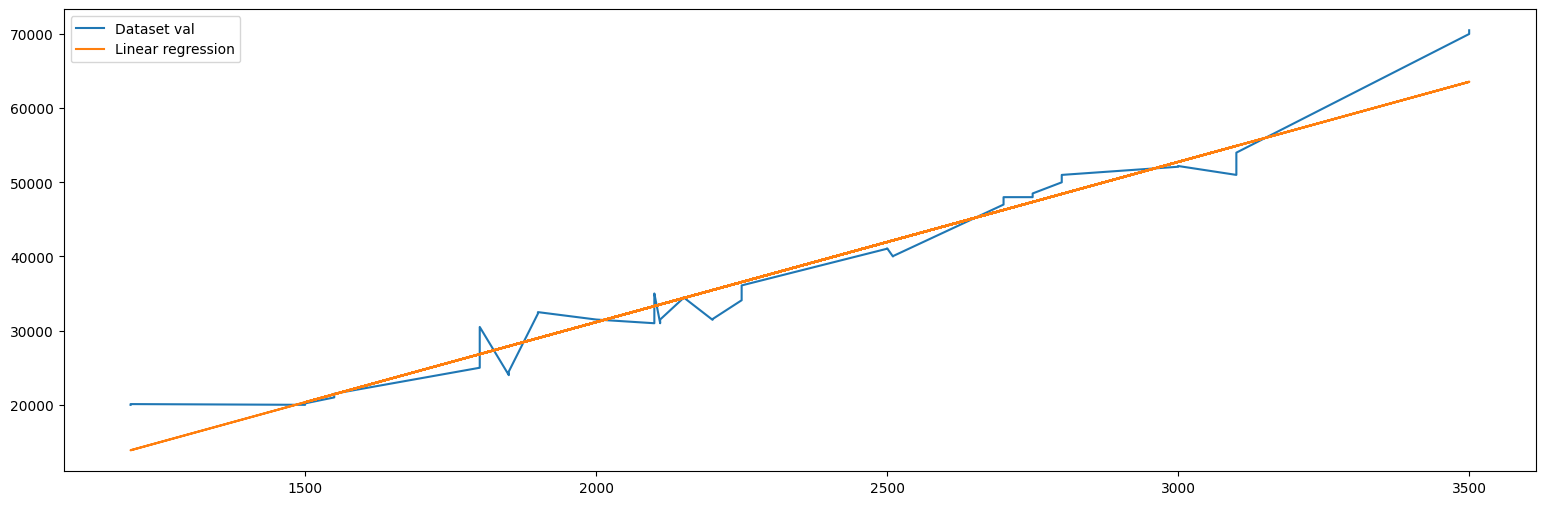

In [6]:
figure, ax = plt.subplots(figsize = (19, 6))
ax.plot(sortedDataFrame['area'], sortedDataFrame['rent'], label='Dataset val')
ax.plot(X_train, model.predict(X_train), label='Linear regression')
ax.legend()
plt.show()

Посчитаем ошибки

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE = %s" % mean_absolute_error(model.predict(X_test), y_test))
print('MSE = %s' % mean_squared_error(model.predict(X_test), y_test))

MAE = 2317.013950529136
MSE = 8389941.221863575


<h4>Пакет catboost</h4>

In [8]:
from catboost import CatBoostRegressor
catModel = CatBoostRegressor(iterations=2500,
                          learning_rate=0.1,
                          depth=6,
                          random_state=740)

catModel.fit(X_train, y_train, verbose=100)


y_pred = catModel.predict(X_test)

0:	learn: 10651.4105322	total: 45.9ms	remaining: 1m 54s
100:	learn: 1224.0466797	total: 55ms	remaining: 1.31s
200:	learn: 1134.5174110	total: 64ms	remaining: 733ms
300:	learn: 1127.7760151	total: 72.8ms	remaining: 532ms
400:	learn: 1126.8502242	total: 82.3ms	remaining: 431ms
500:	learn: 1126.6866046	total: 92.4ms	remaining: 369ms
600:	learn: 1126.6612775	total: 109ms	remaining: 345ms
700:	learn: 1126.6554228	total: 119ms	remaining: 306ms
800:	learn: 1126.6545003	total: 130ms	remaining: 275ms
900:	learn: 1126.6543484	total: 140ms	remaining: 248ms
1000:	learn: 1126.6543172	total: 150ms	remaining: 225ms
1100:	learn: 1126.6543120	total: 161ms	remaining: 204ms
1200:	learn: 1126.6543113	total: 171ms	remaining: 185ms
1300:	learn: 1126.6543112	total: 181ms	remaining: 167ms
1400:	learn: 1126.6543112	total: 191ms	remaining: 150ms
1500:	learn: 1126.6543112	total: 203ms	remaining: 135ms
1600:	learn: 1126.6543112	total: 213ms	remaining: 120ms
1700:	learn: 1126.6543112	total: 224ms	remaining: 105ms


In [9]:
print('MSE = ', mean_squared_error(y_pred, y_test))
print("MAE = ", mean_absolute_error(y_pred, y_test))

MSE =  1728796.2962925609
MAE =  891.6666666250876


<h4>Пакет lightgbm</h4>

In [10]:
import lightgbm as lgb
lightBmModel = lgb.LGBMRegressor(num_leaves=31,
                          learning_rate=0.1, 
                          n_estimators=100, 
                          random_state=42) 
lightBmModel.fit(X_train, y_train, verbose=10)

y_pred = lightBmModel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


<h4>Ошибки:</h4>

In [11]:
print('MSE = ', mean_squared_error(y_pred, y_test))
print("MAE = ", mean_absolute_error(y_pred, y_test))

MSE =  57298019.98191156
MAE =  6361.425512051764


<h4>Пакет xgBoost</h4>

In [12]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 0.1,
    'min_child_weight': 1,
    'seed': 42
}

num_rounds = 100
xgbModel = xgb.train(params, dtrain, num_rounds)

y_pred = xgbModel.predict(dtest)

<h4>Ошибки:</h4>

In [13]:
print('MSE = ', mean_squared_error(y_pred, y_test))
print("MAE = ", mean_absolute_error(y_pred, y_test))

MSE =  10178751.957915625
MAE =  1747.7200520833333


Как видно, в данном случае лучше всего себя показал catboost, на втором месте xgBoost и в конце lightgbm